# Word Embedding e Word2Vec


1. Introdução 
Este notebook apresneta o conceito de Word Embedding e Word2Vec, demostrando como utilizar modelkos de word2vec já treinados. 


Word Embedding é uma das mais técnicas de Word2Vec mais utilizadas para Natural Languange process. A ideia principal é utilizar vetores númericos capazes de representar semanticamente as palavras em relação a sua utilização.  Desta maneita podemos ter :  casa = [0.333, 0.6777, 0.88888 ..]/   mesa = [0.13, 0.0077, 0.0058 ..]

Utilizando ténicas estatísticas, a reprentação vetorial "Embedding" agrega significados a palavra, de maneira que palavras similares fiquem proximas uma das outras vetorialmente, A figura a exemplifica a distâcia vetoria euclidiana .
<img src="https://miro.medium.com/max/697/0*XMW5mf81LSHodnTi.png">


Para gerar uma representação vetorial de conjunto de palavras pode-se utilizar as técnicas Skip Gram ou  Common Bag Of Words (CBOW).
Para maiores detalhes recomendo os seguintes links :
 
 https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
 
 https://www.youtube.com/watch?v=8rXD5-xhemo&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z



Independentemente da ténica utilizada para gerar um representação completa e consistente de um a lingua é preciso uma enormo volume da daos e processamento, felizmente já existe alguem que ja realizou tal processamento e disponiviliza a representação de forma gratuita.

O  Núcleo Interinstitucional de Linguística Computacional da USP, processou diversos fontes de dados como wikioidia ebooks e dicionarios utilizando diversas tecnicas, e disponibiliza os dados em :
http://nilc.icmc.usp.br/embeddings.

Observe que são diponibilizados representações vetoriais com 50, 100 e 300. A ideia é quanto amior a dimensão mais memomoria e processamento são necessários contudo maior a representatividade da palavra.



Vamos começãr ulizando a representação vetoria com 50 dimensões que utilizou a técnica  CBOW.
Baixe Localmente http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip e extaria o arquivo :glove_s50.txt

Observe, os dados foram codificados para serem utilizados segundo a bilioteca gensim do Python 2.6, como eu utilizo python 3 em quase todos meus projetos  eu primeiramente  fiz um tarefa para converter o dados p txt.
        
        


In [ ]:
# abre o flat vector, uma lista de palavras seguidas por numeros 
def openVectorDicionary(path , dim):
    # abre um arquivo .txt contendo cada palavra considerada do Portugues seguida por coordenadas em n dimensoes densas de w2v (skipgram), no casa n=100
    # vcs = abrir(argm_2)
    vcs = open(path).read().lower()
    vecs = vcs.split()

    #  no padrao gensim as duas primeiras linahs contem a dimenção da array 
    vecs = vecs[2:] # 929605 50 
    return vecs

    
TamanhoVetor = 50
    
    
vector = openVectorDicionary('glove_s50.txt', TamanhoVetor)




# partir do vetor cria um dicionario onde cada palavra eh associada a um vetor numerico

In [85]:


import numpy as np

# dimenssão do vetor  flat 
print (len(vector))  
# palavra seguida de 50 float 
indice  = (TamanhoVetor +1) * 200 
print (vector[indice], vector[indice+1], vector[indice +2], ' ..')



def getWord_representation(lista, tamanho, posicao):
    indice  = (tamanho + 1) * posicao
    palavra =  lista[indice]
    vec = np.zeros(tamanho)
    for i in range(tamanho):
        vec[i] = float(lista[indice +1 + i])
        
    return palavra, vec
    
def constroiDicionario(lista, tamanho):
    tamanhoVectoFlat = len(vector)
    NumeroPalavras = int(tamanhoVectoFlat /( tamanho + 1))
    print('tamanho', tamanhoVectoFlat, NumeroPalavras)
    dicionario =	{}
    for i in range(NumeroPalavras):
        palavra, vec =  getWord_representation(lista, tamanho, i )
        dicionario[palavra] = vec
    
    return dicionario
    
dicionario = constroiDicionario(vector , TamanhoVetor )   

def exportDicionario(dicionario, path):
    f = open(path, "a")
    for x in dicionario:
        texto = "\"" + x + "\""
        for v in dicionario[x]:
            texto  = texto  + ',' + str(v)
        f.write(texto + '\n')

exportDicionario(dicionario, 'dicionario.csv')




47409863
sistema 0.057136 1.004912  ..
tamanho 47409863 2000



# Lendo dicionario salvo 
O arquivo dic.csv contem uma representação e word2vec já salva. contendo em cada linha uma plavra e sua representação vetoria em 50 dimensões



In [91]:
import pandas as pd


def openDicionario(path):
    headerc = ['nome', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']
    dataclas = pd.read_csv( path,  names=headerc);
    dataclas.set_index('nome',inplace=True)
    dataclas.head(5)
    return dataclas

dicionarioL = openDicionario('dic.csv')





In [197]:



def getVector(word):
    try:
        v = dicionarioL.loc[word]
        vect = v.values
        return vect
    except:
        if len(word) > 3:
            print('- ' + word)
        return []



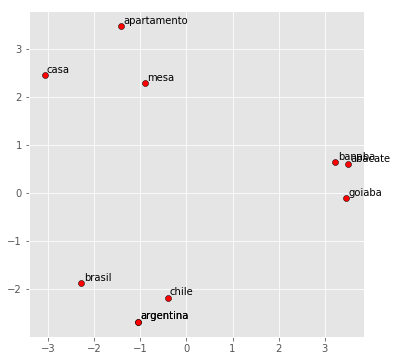

In [196]:


def getarray(palavras):
    npl = len(palavras)    
    word_vectors = np.array([getVector(pl + ' ') for pl in palavras])    
    return word_vectors  


def impgrafico(palavras  ):
    from sklearn.decomposition import PCA   
    vec= getarray(palavras)

    #vec = np.transpose(vec)        
    import matplotlib.pyplot as plt


    pca = PCA(n_components=2)
    vectwodim = PCA(n_components=2).fit_transform(vec)
    
    plt.style.use('ggplot')    
    plt.figure(figsize=(6,6))
    plt.scatter(vectwodim[:,0], vectwodim[:,1], edgecolors='k', c='r')
    
    for palavra, (x,y) in zip(palavras, vectwodim):
        plt.text(x+0.05, y+0.05, palavra)
        
    plt.show()    


  
        
palavras = ('argentina','argentina', 'casa', 'apartamento',
            'banaba', 'goiaba', 'abacate','chile', 'brasil', 'mesa')


impgrafico(palavras  )
        


Observe que as frutas,  paises e objetos estão muito perto um dos outros .



